# PCA clustering for WINE dataset

In [1]:
'''Determining Principle Component Analysis for Wine Dataset'''

# Importing Preliminary Libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model 
#from sklearn import linear_model.fit
from sklearn.linear_model import LinearRegression 
from sklearn.decomposition import PCA 
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [2]:
# Loading Wine dataset

df = pd.read_csv('Wine.csv')

'''Determing only first 5 values '''
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
# Taking only the dependent value from the dataset

df2 = df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']]
df2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# PCA cluster plot for Wine Dataset

In [1]:
#Importing libraries from SKLEARN

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

In [6]:
#loading Wine dataset
wine = datasets.load_wine()

X = wine.data
y = wine.target
target_names = wine.target_names

pca = PCA(n_components=13)
wine_X = pca.fit(X).transform(X)

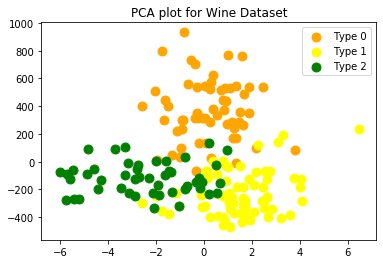

In [121]:
plt.scatter(wine_X[y == 0, 3], wine_X[y == 0, 0], s =80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[y == 1, 3], wine_X[y == 1, 0], s =80,  c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[y == 2, 3], wine_X[y == 2, 0], s =80,  c = 'green', label = 'Type 2')
plt.title('PCA plot for Wine Dataset')
plt.legend()

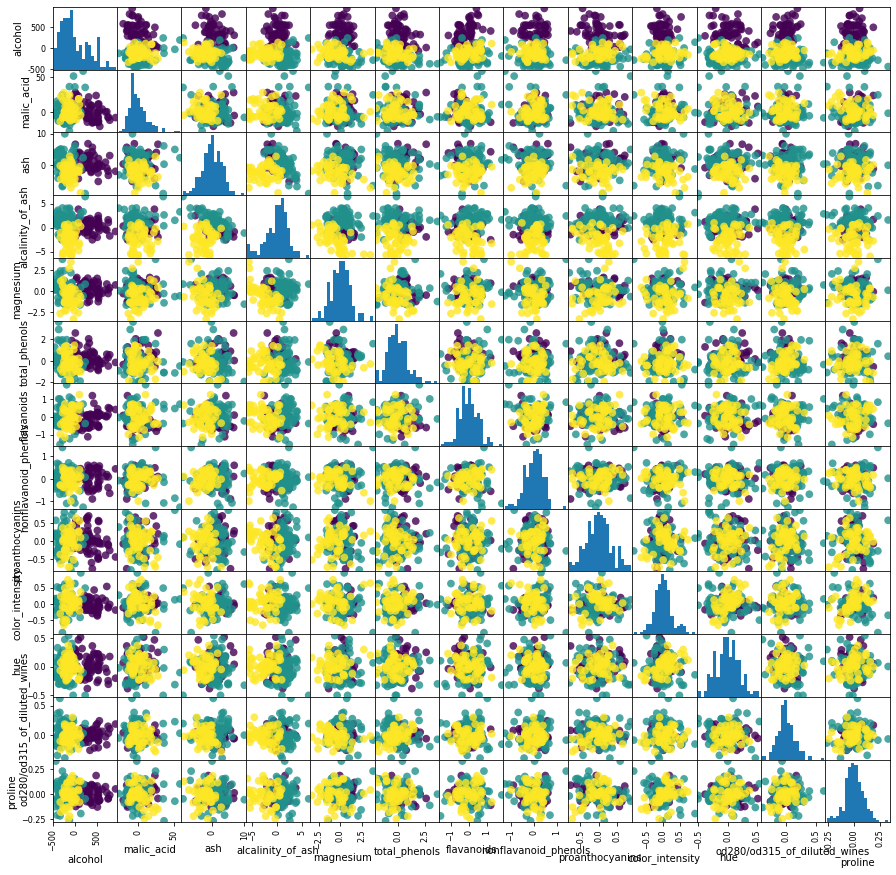

In [71]:

import pandas as pd

wine_dataframe = pd.DataFrame(wine_X, columns=wine.feature_names)

# Create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(wine_dataframe, c=y, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

In [3]:
'''KNN classifier which is a type of supervised Machine Learning Technique. 
This is used to detect the accuracy and classification  of the given dataset'''

# Importing Libraries for Modelling.
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [57]:


# Assigning values of X and y from dataset

X, y = wine.data[:, :], wine.target  
''' Here X is assigned as all the column data(SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) and
y is assigned as Species value(Iris-setosa, Iris-versicolour, Iris-virginica)  ))'''

#Setting training and testing values

Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Modeling is done using KNN classifiers.
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)


# Display the Output

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Accuracy Score: 0.9333333333333333
Confusion matrix 
 [[23  0  0]
 [ 2 12  1]
 [ 0  0  7]]
Classification 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.80      0.89        15
           2       0.88      1.00      0.93         7

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [60]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8887973640856672

In [7]:
X, y = wine.data[:, :], wine.target  
Xtrain, Xtest, y_train, y_test = train_test_split(X, y)

# Logistic Regression Accuracy 

In [8]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9555555555555556
[[19  2  0]
 [ 0 15  0]
 [ 0  0  9]]


C:\Users\Ayantika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ayantika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Cohen Kappa Accuracy for LR

In [9]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9302325581395349

# K-Nearest Neighbors Accuracy

In [17]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("K Nearest Neighbors :")
print("Accuracy = ", accuracy)
print(cm)

K Nearest Neighbors :
Accuracy =  0.8055555555555556
[[13  0  1]
 [ 0 14  2]
 [ 2  2  2]]


# Cohen Kappa Accuracy for KNN

In [18]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.685

# Support Vector Machine Accuracy

In [64]:
#Support Vector Machine
from sklearn.svm import SVC
 
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
classifier = SVC()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.4861111111111111
[[ 3 19  0]
 [ 0 31  0]
 [ 1 17  1]]


C:\Users\Ayantika\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Cohen Kappa Accuracy for SVM

In [65]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.1120000000000001

# Gaussian Naive Bayes Accuracy

In [50]:
Xtrain, Xtest, y_train, y_test = train_test_split(X, y)

In [51]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy)
print(cm)

Gaussian Naive Bayes :
Accuracy =  0.9777777777777777
[[14  0  0]
 [ 0 20  1]
 [ 0  0 10]]


# Cohen Kappa Accuracy for GNB

In [52]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9653579676674365

# Decision Tree Classifier Accuracy

In [53]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.9777777777777777
[[13  1  0]
 [ 0 21  0]
 [ 0  2  8]]


# Cohen Kappa Accuracy for DTC

In [54]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8927720413026211

# Random Forest Classifier Accuracy

In [55]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)


Random Forest Classifier :
Accuracy =  0.9777777777777777
[[15  0  0]
 [ 0 13  1]
 [ 0  1 15]]


# Cohen Kappa Accuracy for RFC

In [56]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9332344213649851